In [14]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:


# Load the data into a DataFrame
df = pd.read_csv('data/teleCust1000t.csv')

# Display the first few rows of the DataFrame
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [16]:
df.shape

(1000, 12)

In [17]:
column_names = df.columns.tolist()
print(column_names)

['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']


In [18]:

from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Telecom Customer Data Profiling Report")

profile.to_file("data/df_ydata_profiling.html") #this saves it as a HTML file

profile.to_file("data/output.json") #this saves it as a JSON file

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Analizar relación entre region y otras características como ed, income o custcat para saber si es categorica nominal u ordinal.

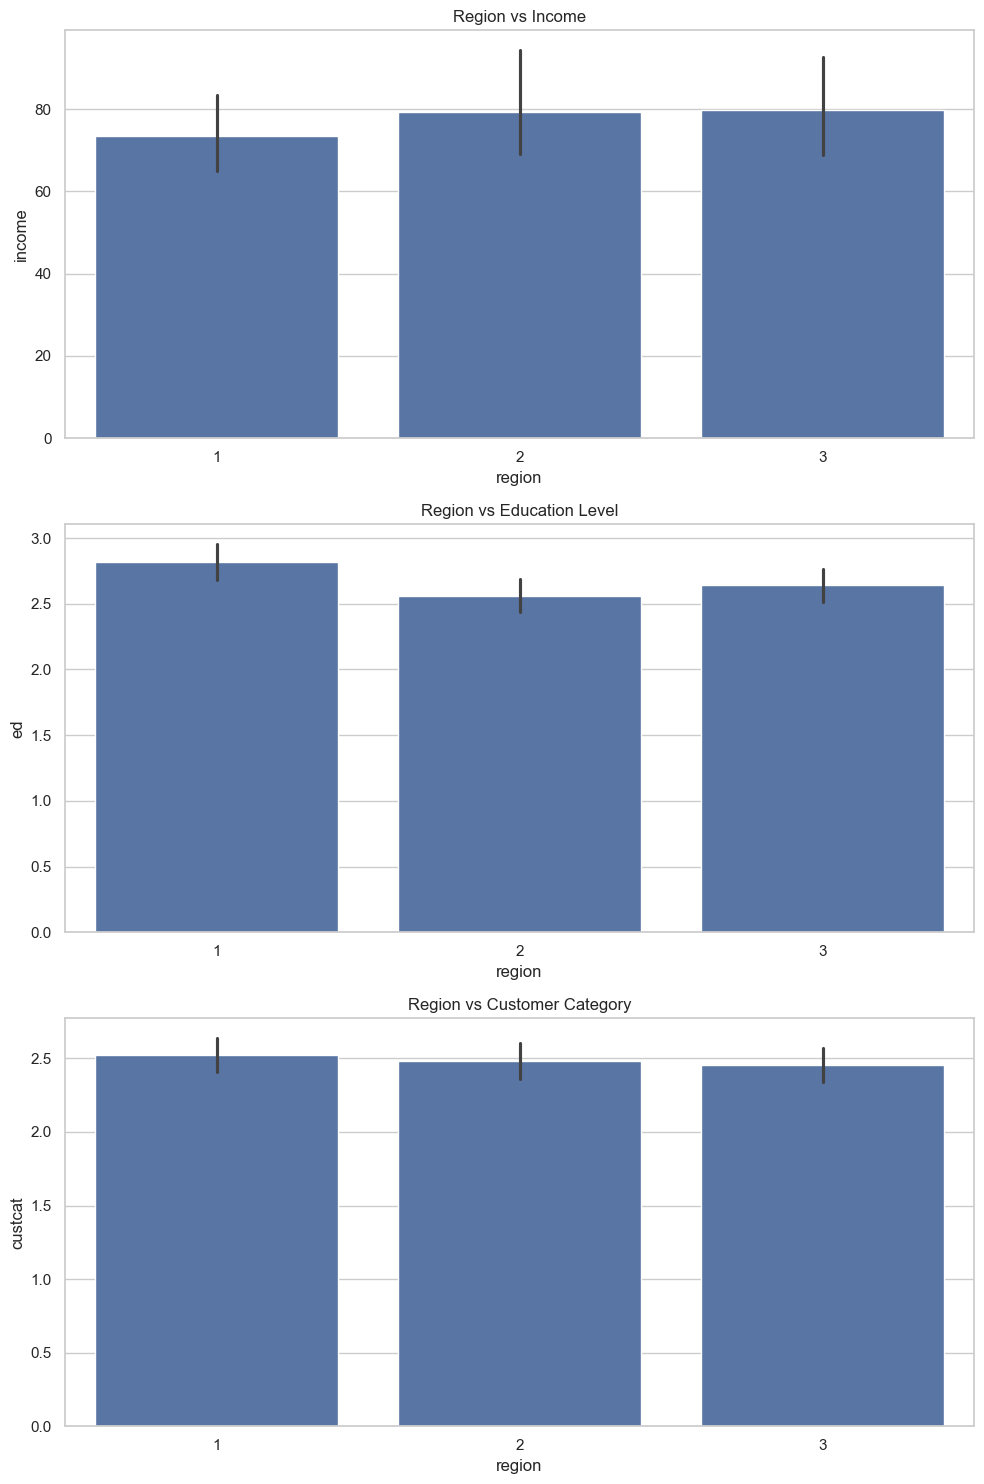

In [19]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the relation between 'region' and 'income'
sns.barplot(x='region', y='income', data=df, ax=axes[0])
axes[0].set_title('Region vs Income')

# Plot the relation between 'region' and 'ed'
sns.barplot(x='region', y='ed', data=df, ax=axes[1])
axes[1].set_title('Region vs Education Level')

# Plot the relation between 'region' and 'custcat'
sns.barplot(x='region', y='custcat', data=df, ax=axes[2])
axes[2].set_title('Region vs Customer Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display plots in Jupyter notebook
%matplotlib inline
plt.show()

Income t-test p-value: 0.0081
Age t-test p-value: 0.0000


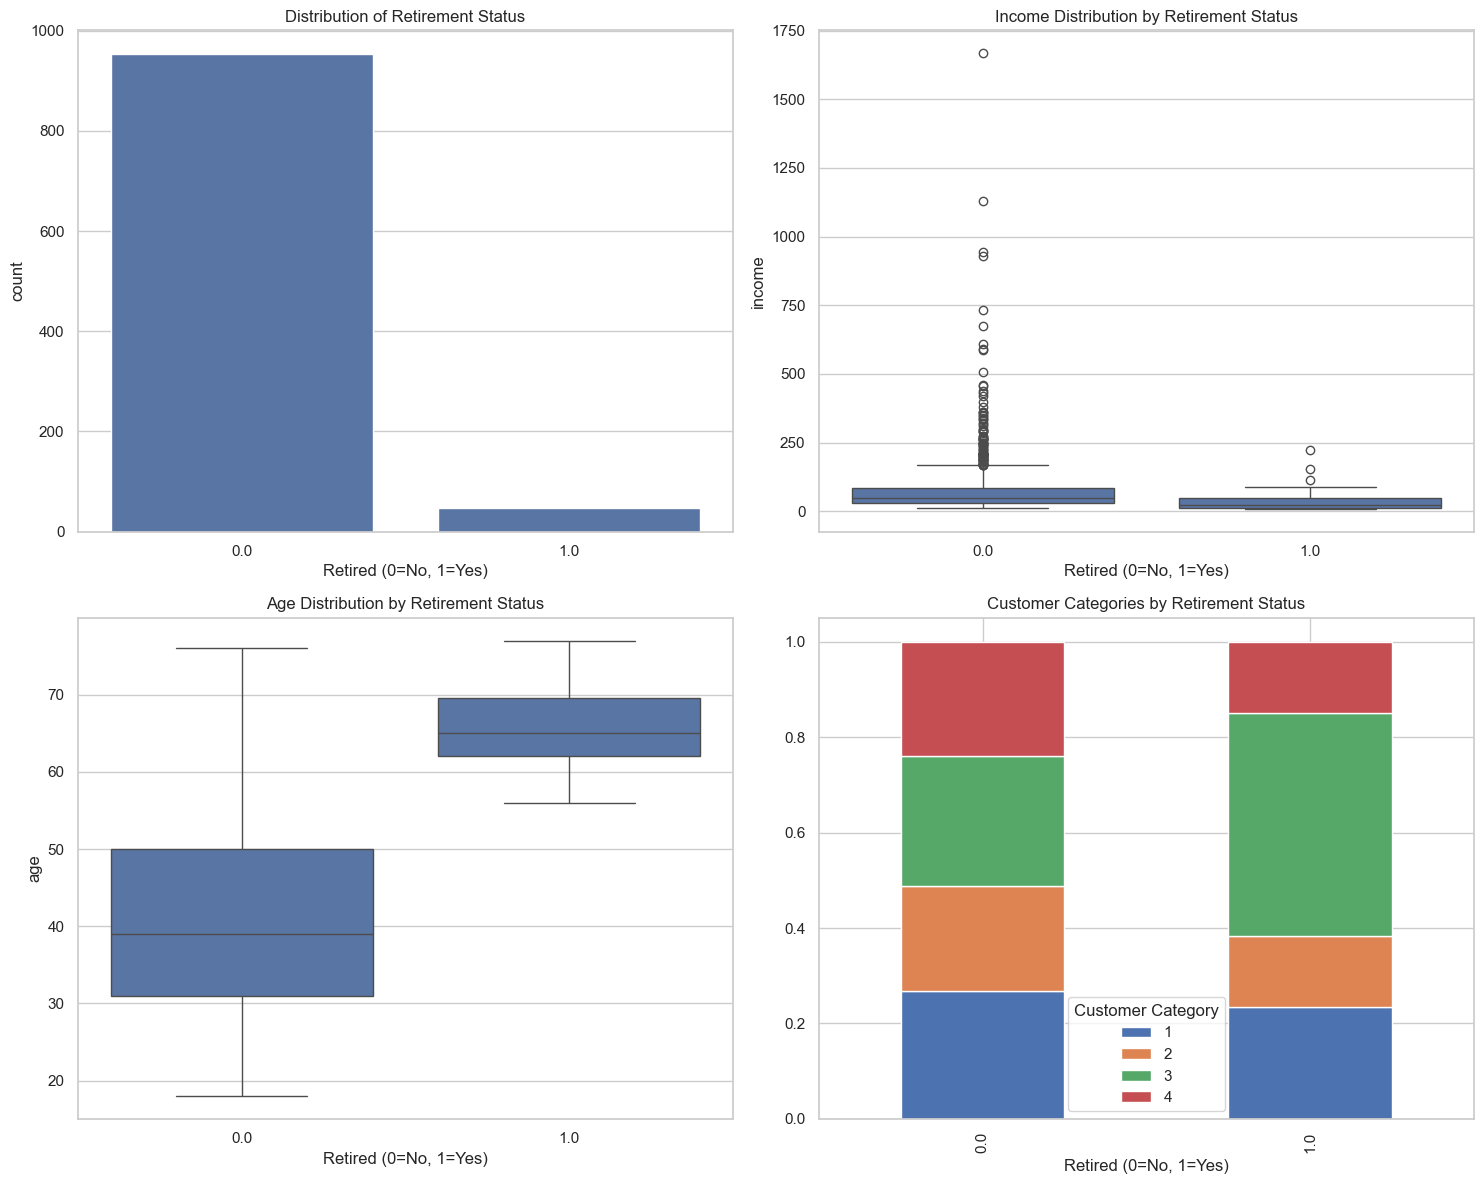

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of retire column
sns.countplot(data=df, x='retire', ax=axes[0,0])
axes[0,0].set_title('Distribution of Retirement Status')
axes[0,0].set_xlabel('Retired (0=No, 1=Yes)')

# 2. Box plot for income by retirement status
sns.boxplot(data=df, x='retire', y='income', ax=axes[0,1])
axes[0,1].set_title('Income Distribution by Retirement Status')
axes[0,1].set_xlabel('Retired (0=No, 1=Yes)')

# 3. Box plot for age by retirement status
sns.boxplot(data=df, x='retire', y='age', ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Retirement Status')
axes[1,0].set_xlabel('Retired (0=No, 1=Yes)')

# 4. Normalized stacked bar for customer categories
custcat_retire = pd.crosstab(df['retire'], df['custcat'], normalize='index')
custcat_retire.plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Customer Categories by Retirement Status')
axes[1,1].set_xlabel('Retired (0=No, 1=Yes)')
axes[1,1].legend(title='Customer Category')

# Add statistical tests results
t_stat_income, p_val_income = stats.ttest_ind(df[df['retire']==0]['income'], 
                                             df[df['retire']==1]['income'])
t_stat_age, p_val_age = stats.ttest_ind(df[df['retire']==0]['age'], 
                                       df[df['retire']==1]['age'])

# Print statistical results
print(f"Income t-test p-value: {p_val_income:.4f}")
print(f"Age t-test p-value: {p_val_age:.4f}")

plt.tight_layout()
plt.show()

#### Observación: La característica region es una variable categorica ordinal. Se puede utilizar one-hot encoding para especificar que no hay un orden o bien algoritmos como Random Forest o Gradient Boosting pueden tratarlas sin necesidad de encoding.

Chi-square statistic: 8.9692
p-value: 0.0297


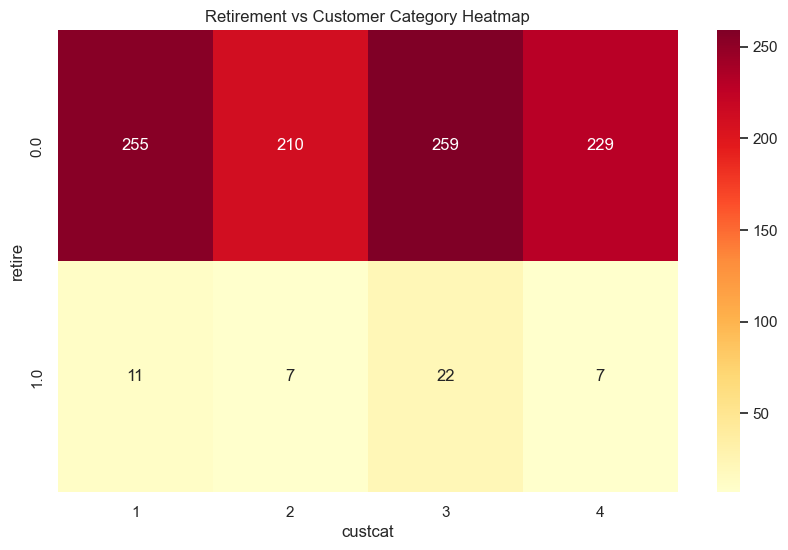


Percentage Distribution:
custcat          1          2          3          4
retire                                             
0.0      26.757608  22.035677  27.177335  24.029381
1.0      23.404255  14.893617  46.808511  14.893617


In [20]:
# Import required libraries
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create contingency table
contingency = pd.crosstab(df['retire'], df['custcat'])

# Perform chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency)

# Print results
print(f'Chi-square statistic: {chi2:.4f}')
print(f'p-value: {p_value:.4f}')

# Visualize relationship
plt.figure(figsize=(10, 6))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Retirement vs Customer Category Heatmap')
plt.show()

# Additional insight - percentage distribution
percentage = pd.crosstab(df['retire'], df['custcat'], normalize='index') * 100
print("\nPercentage Distribution:")
print(percentage)

Analisis de la variable age con respecto al target custcat

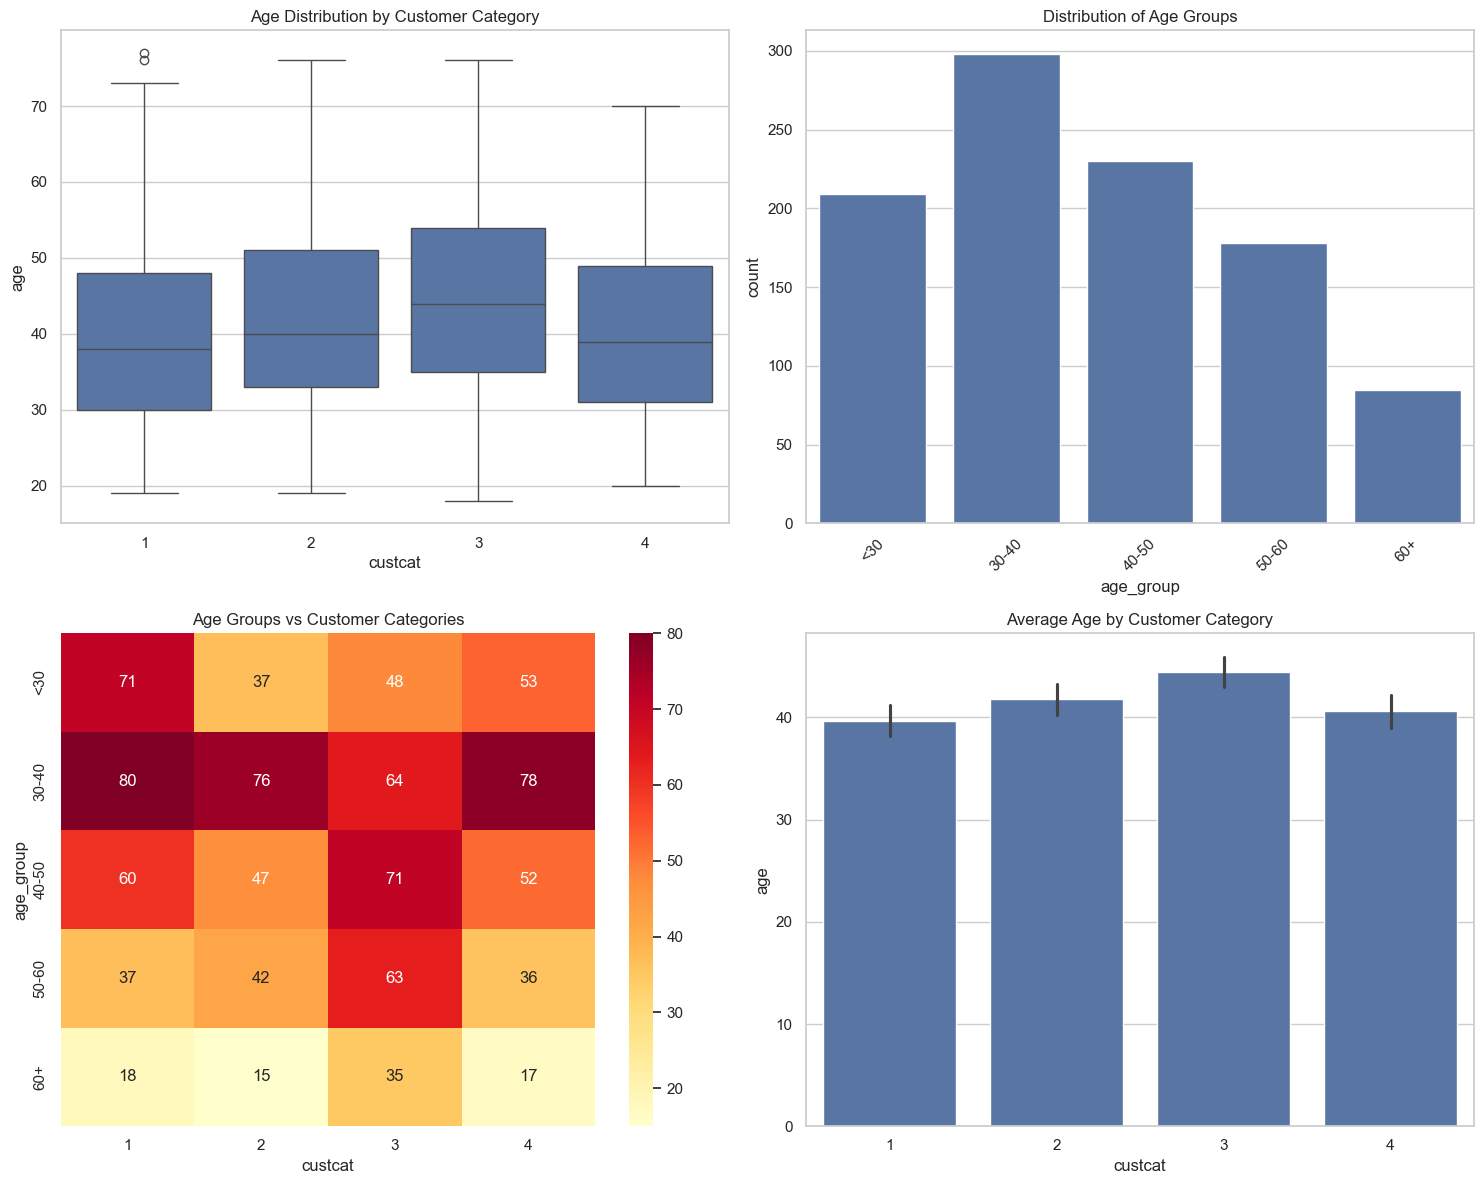


Customer Category Distribution by Age Group:
custcat            1          2          3          4
age_group                                            
<30        33.971292  17.703349  22.966507  25.358852
30-40      26.845638  25.503356  21.476510  26.174497
40-50      26.086957  20.434783  30.869565  22.608696
50-60      20.786517  23.595506  35.393258  20.224719
60+        21.176471  17.647059  41.176471  20.000000


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create age buckets
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], 
                        labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of age by customer category
sns.boxplot(data=df, x='custcat', y='age', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Customer Category')

# 2. Age groups distribution
sns.countplot(data=df, x='age_group', ax=axes[0,1])
axes[0,1].set_title('Distribution of Age Groups')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Heatmap of age groups vs customer categories
age_cust = pd.crosstab(df['age_group'], df['custcat'])
sns.heatmap(age_cust, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1,0])
axes[1,0].set_title('Age Groups vs Customer Categories')

# 4. Average age by customer category
sns.barplot(data=df, x='custcat', y='age', ax=axes[1,1])
axes[1,1].set_title('Average Age by Customer Category')

plt.tight_layout()
plt.show()

# Print statistics by age group
print("\nCustomer Category Distribution by Age Group:")
print(pd.crosstab(df['age_group'], df['custcat'], normalize='index')*100)

Mismo analisis de age con respecto a custcat pero creando buckets con aproximadamente el mismo número de muestras pero asegurándose que una edad no pertenece a más de un bucket.

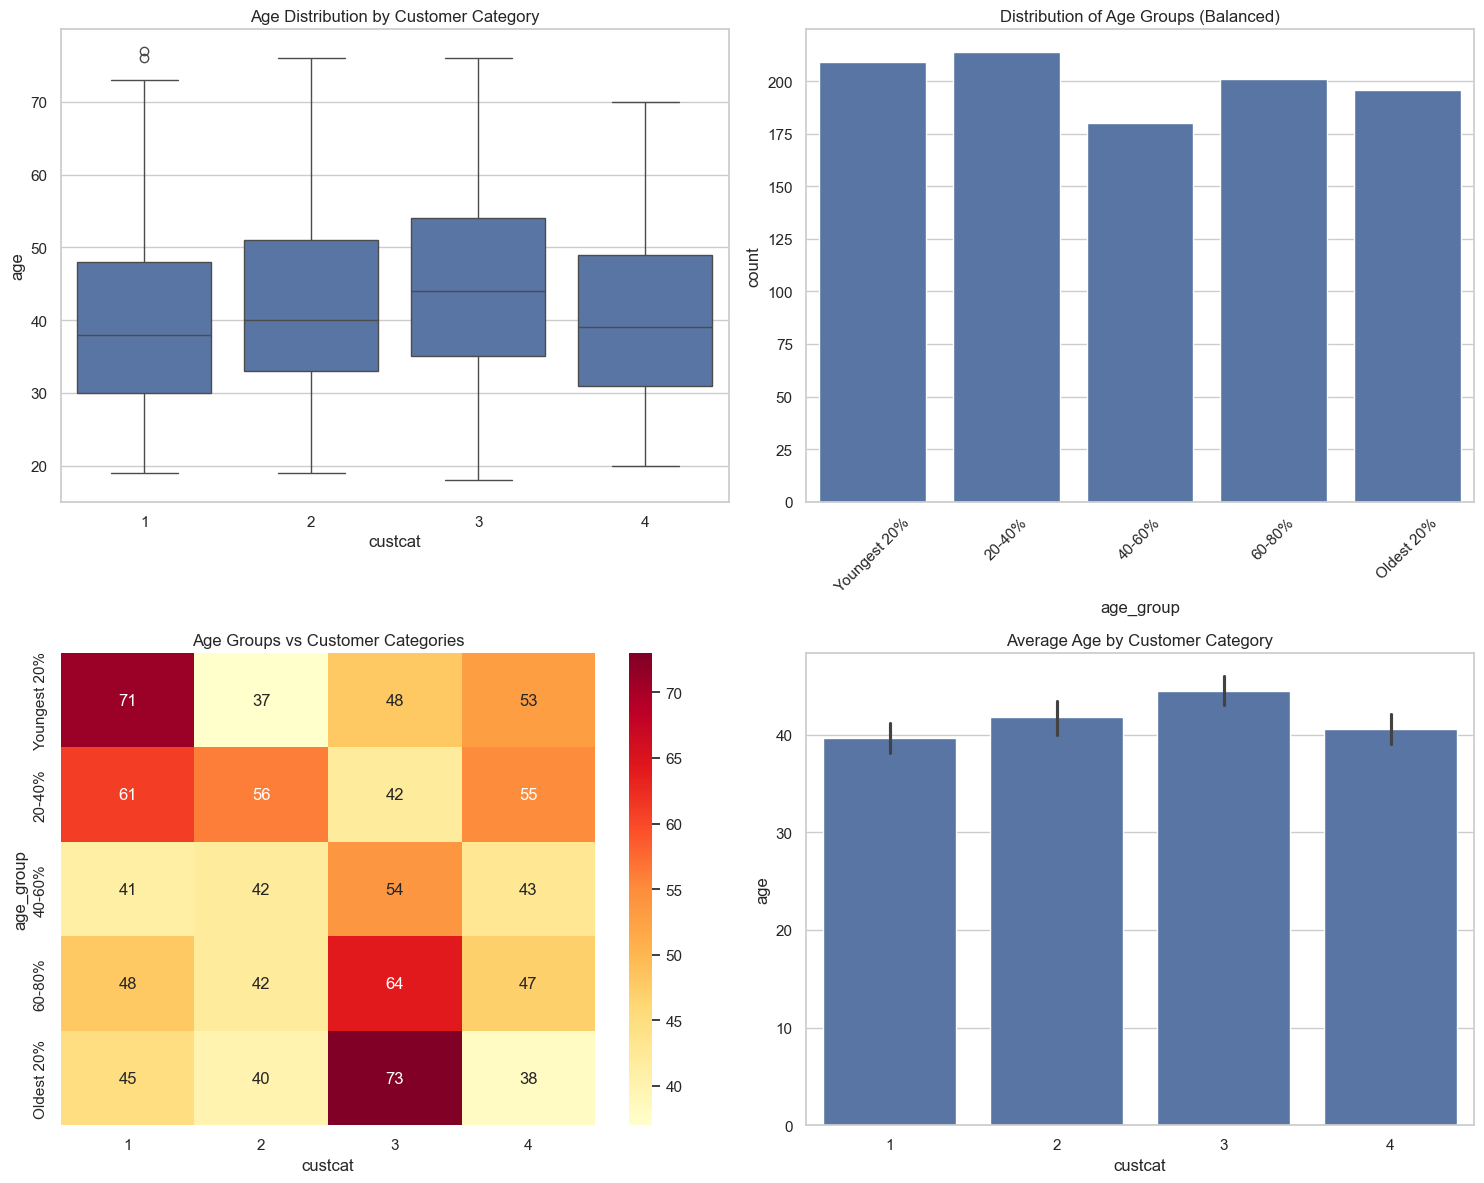


Age bucket boundaries:
0    18.0
1    30.0
2    37.0
3    44.0
4    53.0
5    77.0
dtype: float64

Customer Category Distribution by Age Group (%):
custcat               1          2          3          4
age_group                                               
Youngest 20%  33.971292  17.703349  22.966507  25.358852
20-40%        28.504673  26.168224  19.626168  25.700935
40-60%        22.777778  23.333333  30.000000  23.888889
60-80%        23.880597  20.895522  31.840796  23.383085
Oldest 20%    22.959184  20.408163  37.244898  19.387755


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate quantiles for balanced buckets
quantiles = df['age'].quantile([0.2, 0.4, 0.6, 0.8])
bins = [df['age'].min()] + list(quantiles) + [df['age'].max()]
labels = ['Youngest 20%', '20-40%', '40-60%', '60-80%', 'Oldest 20%']

# Create balanced age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of age by customer category
sns.boxplot(data=df, x='custcat', y='age', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Customer Category')

# 2. Age groups distribution
sns.countplot(data=df, x='age_group', ax=axes[0,1])
axes[0,1].set_title('Distribution of Age Groups (Balanced)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Heatmap of age groups vs customer categories
age_cust = pd.crosstab(df['age_group'], df['custcat'])
sns.heatmap(age_cust, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1,0])
axes[1,0].set_title('Age Groups vs Customer Categories')

# 4. Average age by customer category
sns.barplot(data=df, x='custcat', y='age', ax=axes[1,1])
axes[1,1].set_title('Average Age by Customer Category')

plt.tight_layout()
plt.show()

# Print statistics
print("\nAge bucket boundaries:")
print(pd.Series(bins).round(2))
print("\nCustomer Category Distribution by Age Group (%):")
print(pd.crosstab(df['age_group'], df['custcat'], normalize='index')*100)

#### Diccionario de datos

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| region      | Region donde vive el cliente | Categorical Feature (Nominal) |
| tenure      | Meses de permanencia del cliente | Numerical Feature |
| age         | Edad del cliente | Numerical Feature |
| marital     | Estado civil del cliente | Categorical Feature (Nominal) |
| address     | años del cliente en el mismo domicilio| Numerical Feature |
| income      | Ingresos del cliente | Numerical Feature |
| ed          | Nivel educativo del cliente | Categorical Feature (Ordinal) |
| employ      | Años de empleo del cliente | Numerical Feature |
| retire      | Estado de jubilación del cliente | Categorical Feature (Nominal) |
| gender      | Género del cliente | Categorical Feature (Nominal) |
| reside      | Habitantes en el domicilo | Numerical Feature |
| custcat     | Categoría del cliente | Target |